In [1]:
from kitaev import *
from tqdm import tqdm

#t=1
N_global = 200
d_global = 4
delta = 0.50*t


def onsite(t=t, mu=mu, B=B, delta=delta):
    return (2 * t - mu) * np.kron(s_z,s_0) + B * np.kron(s_0,s_z) + delta * np.kron(s_x,s_0)


def hopping(t=t, alpha=a):
    return -t * np.kron(s_z,s_0) + 0.5 * 1j * alpha * np.kron(s_z,s_x)

J = 2.0
p1 = {'t':J / 2, 'mu':-1 * J, 'B':J, 'delta':2 * J, 'alpha':J}
p2 = {'t':J / 2, 'mu':-3 * J, 'B':J, 'delta':2 * J, 'alpha':J}



periods = np.linspace(0.2 / J, 1.6 / J, 100)
momenta = np.linspace(-np.pi, np.pi)

h_1 = Hamiltonian(4,N_global,onsite(t = p1['t'],mu=p1['mu'],B=p1['B'],delta=p1['delta']),hopping(t=p1['t'],alpha=p1['alpha']))
h_2 = Hamiltonian(4,N_global,onsite(t = p2['t'],mu=p2['mu'],B=p2['B'],delta=p2['delta']),hopping(t=p2['t'],alpha=p2['alpha']))






var_T = np.arange(0.02, 1.6, 0.02)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

delta_amount =  0.000001
delta_positive_0 = (delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_0 = (-delta_amount * 1j) * np.eye(N_global * d_global)
delta_positive_pi = (1 + delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi = (-1 - delta_amount * 1j) * np.eye(N_global * d_global)

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])
    G_0_pos = np.array(la.inv(delta_positive_0 - h_f))
    G_0_neg = np.array(la.inv(delta_negative_0 - h_f))

    G_0_odd.append((G_0_pos - G_0_neg) / 2)
    G_0_even.append((G_0_pos + G_0_neg) / 2)

    G_pi_pos = np.array(la.inv(delta_positive_pi - h_f))
    G_pi_neg = np.array(la.inv(delta_negative_pi - h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg) / 2)
    G_pi_even.append((G_pi_pos + G_pi_neg) / 2)
    pass



hi


100%|██████████| 79/79 [06:13<00:00,  4.73s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


79


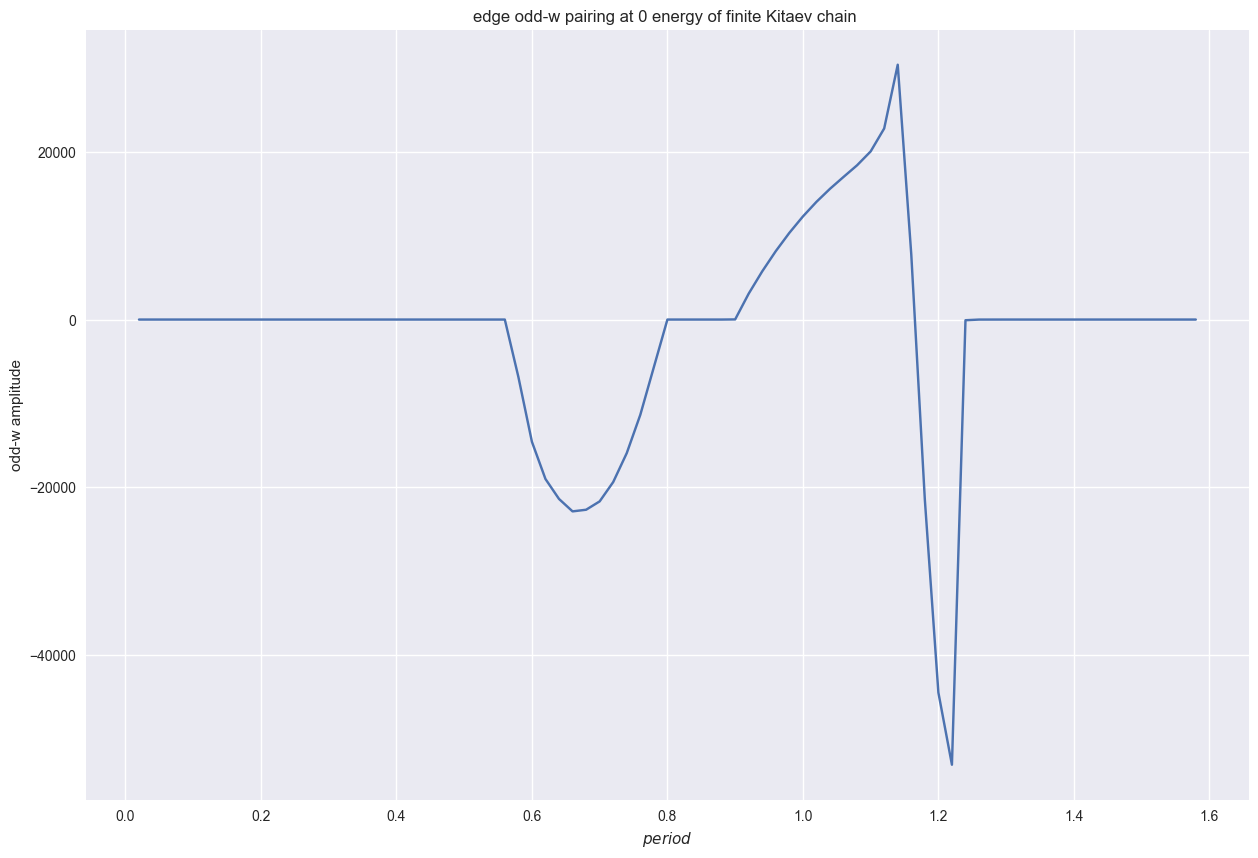

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


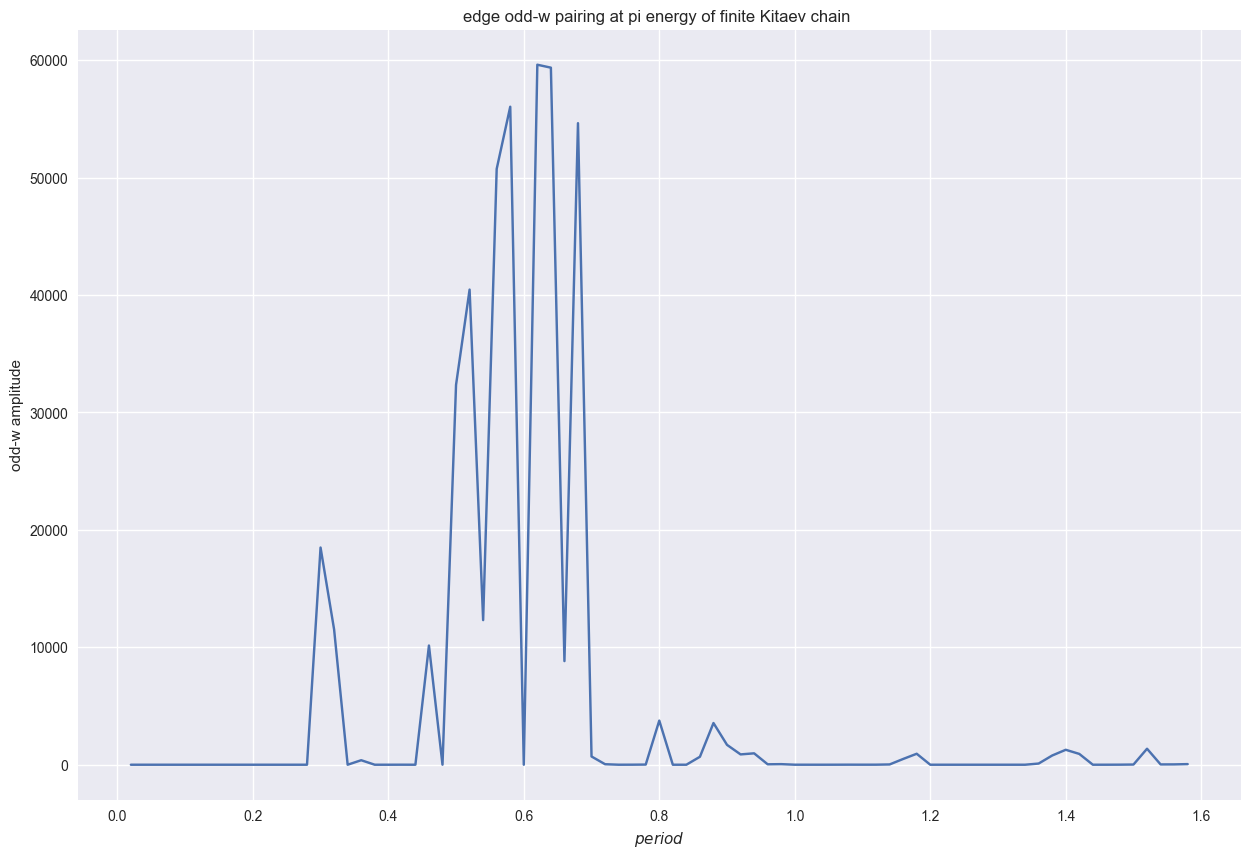

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


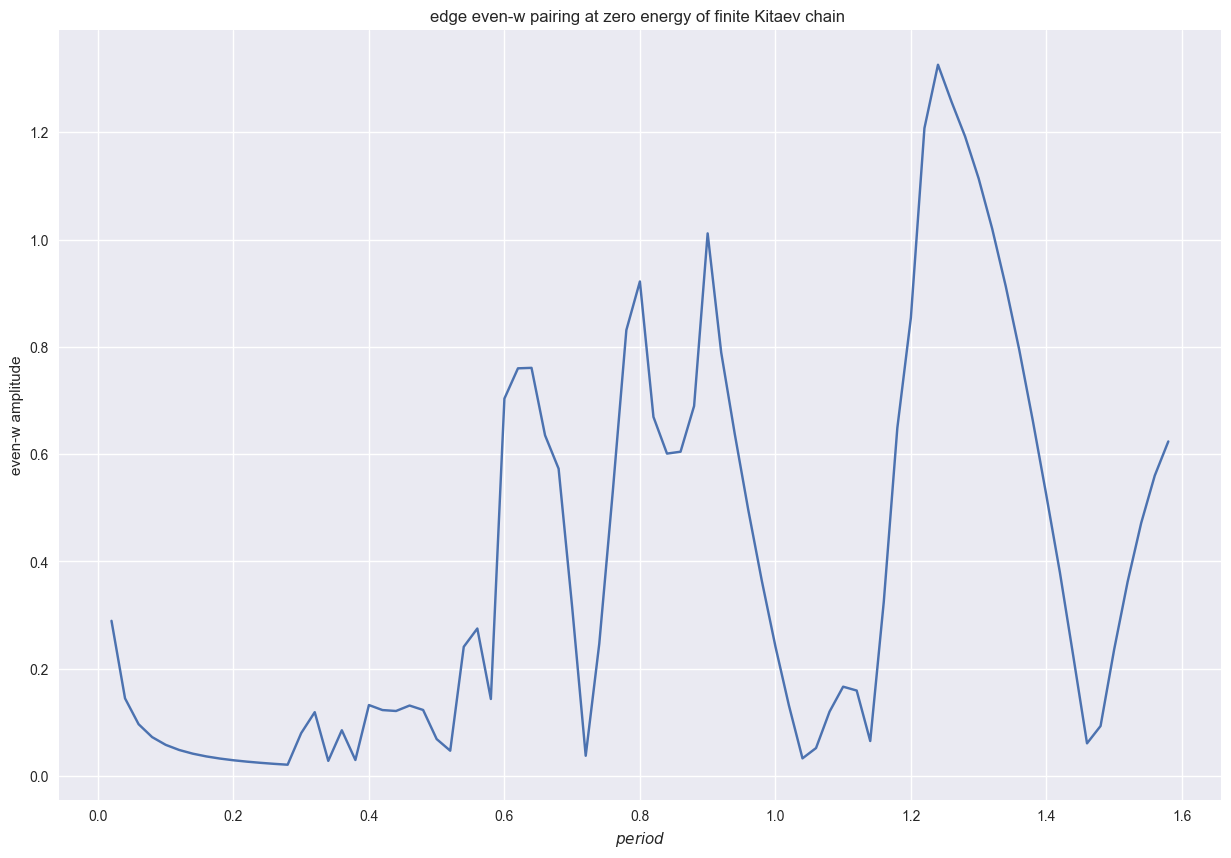

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


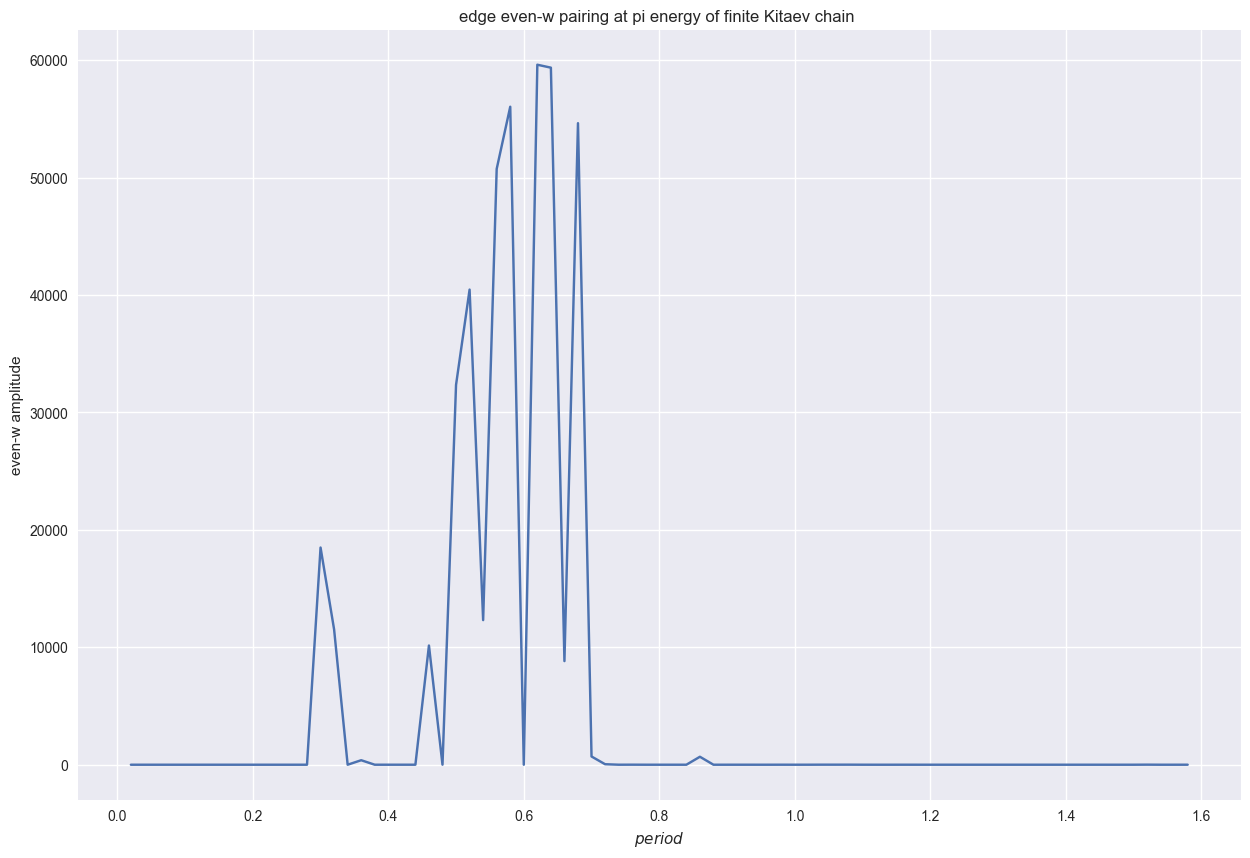

In [2]:
f_0_odd = [(G_0_odd[i][0, 1].imag) for i in range(len(G_0_odd))]
f_0_even = [np.abs(G_0_even[i][0, 1].imag) for i in range(len(G_0_even))]
f_pi_odd = [np.abs(G_pi_odd[i][0, 1].imag) for i in range(len(G_pi_odd))]
f_pi_even = [np.abs(G_pi_even[i][0, 1].imag) for i in range(len(G_pi_even))]
print(len(G_0_odd))

plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T, f_0_odd)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_odd)
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T, f_0_even)
plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_even)
plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [3]:
f_0_odd_bulk = [[G_0_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_0_even_bulk =  [[G_0_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_odd_bulk =  [[G_pi_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_even_bulk =  [[G_pi_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


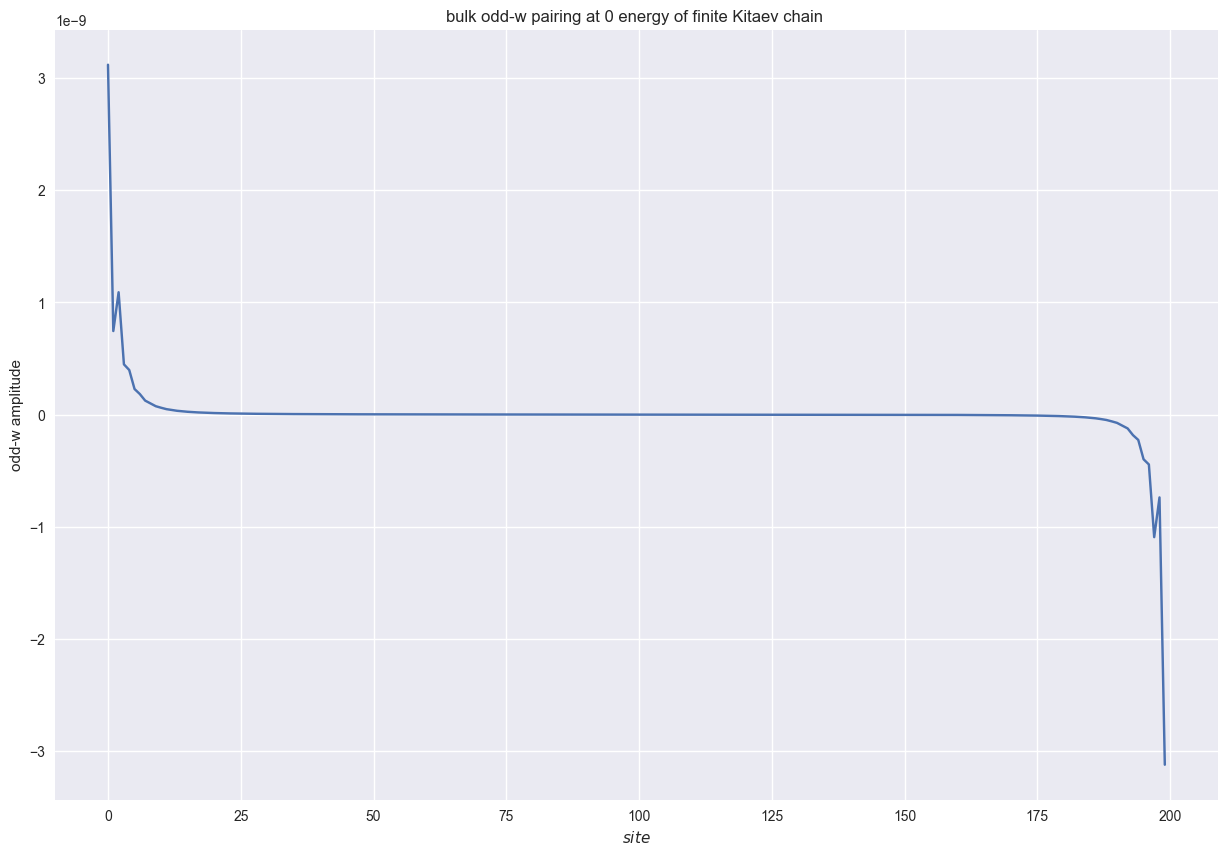

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


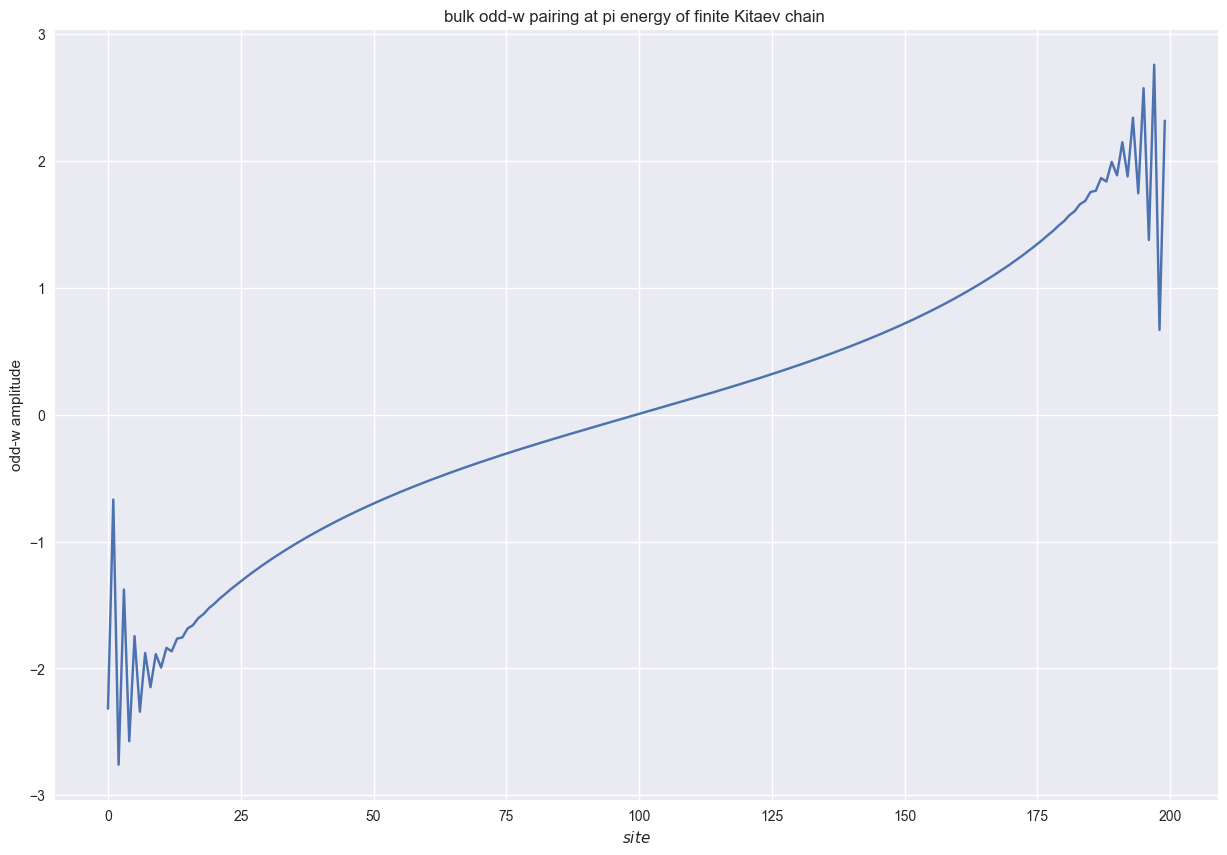

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


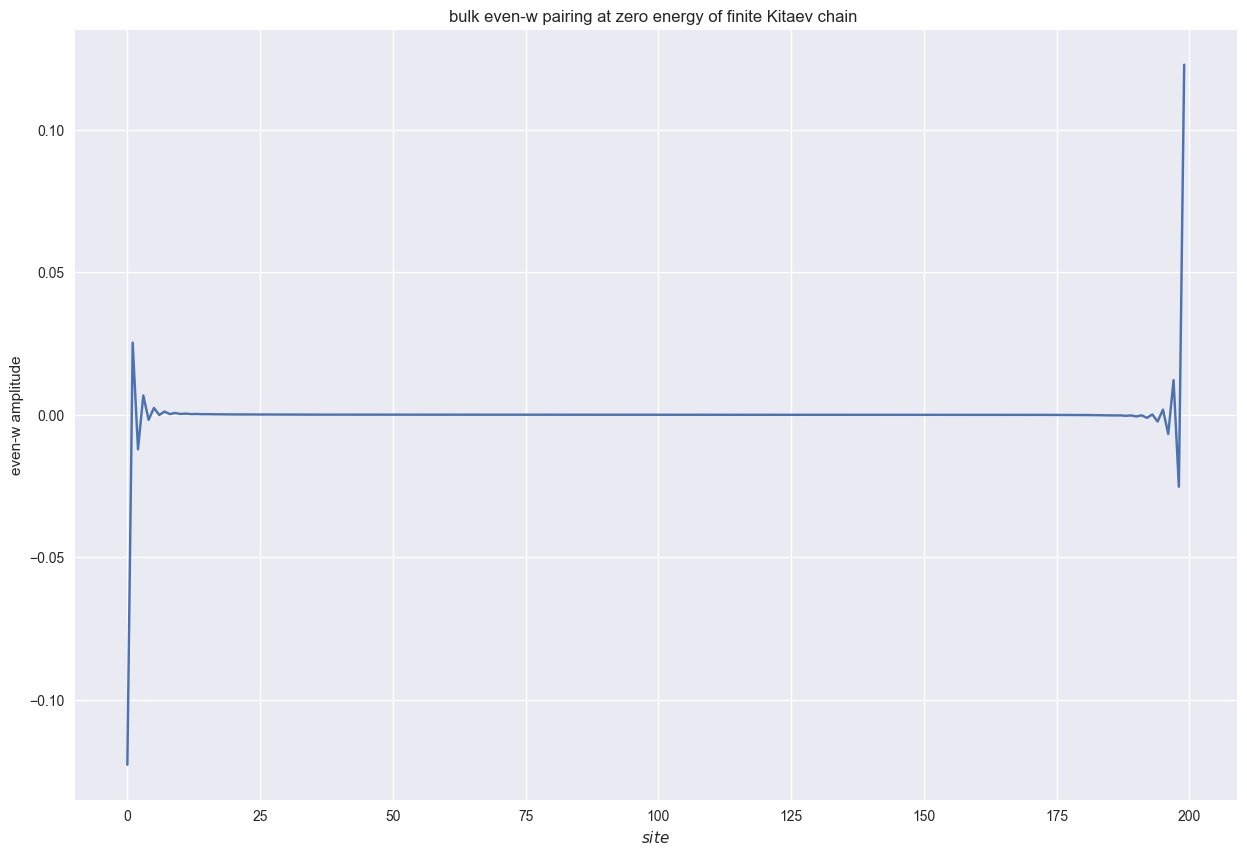

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


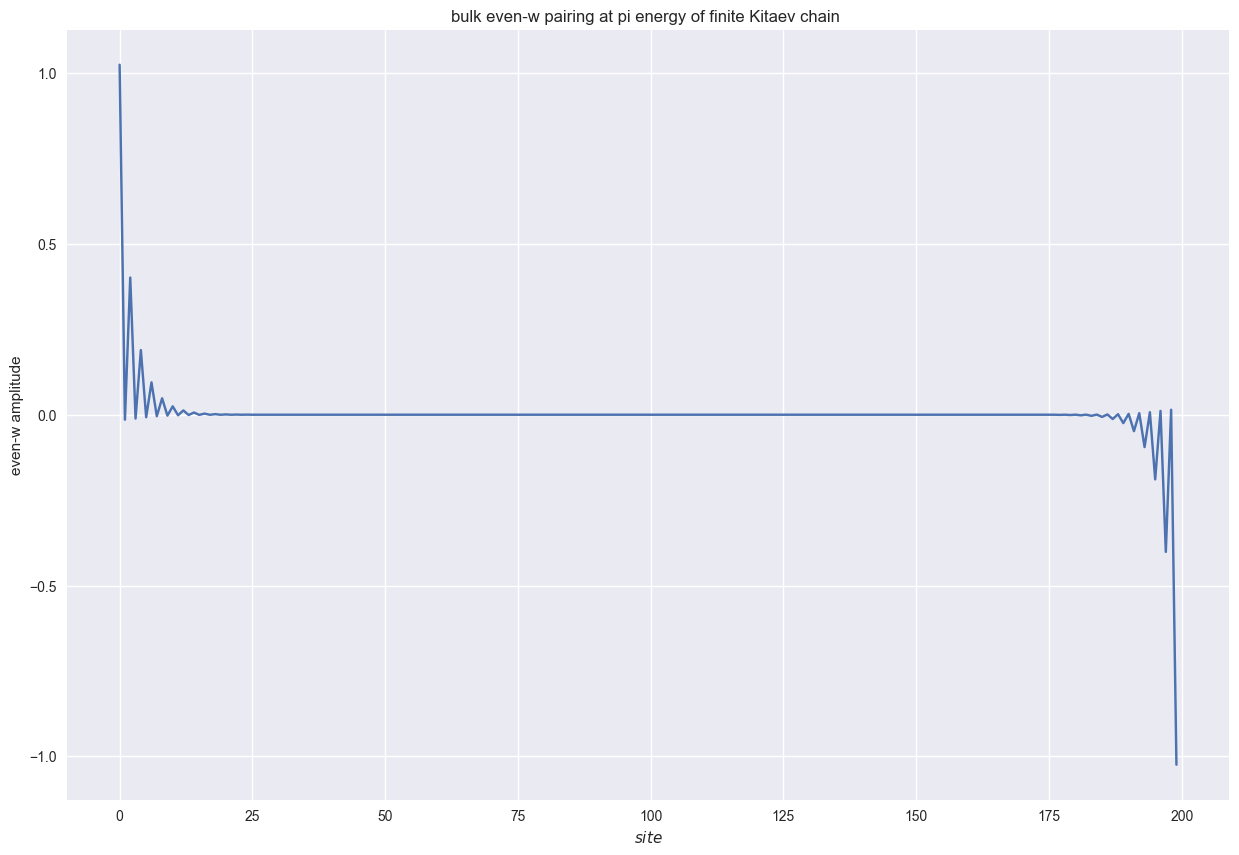

In [4]:
good_number = 20
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

In [5]:
f_0_odd_bulk = [[G_0_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_0_even_bulk =  [[G_0_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_odd_bulk =  [[G_pi_odd[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]
f_pi_even_bulk =  [[G_pi_even[i][0+n*d_global,1+n*d_global].imag for n in range(N_global)] for i in range(len(G_0_odd))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


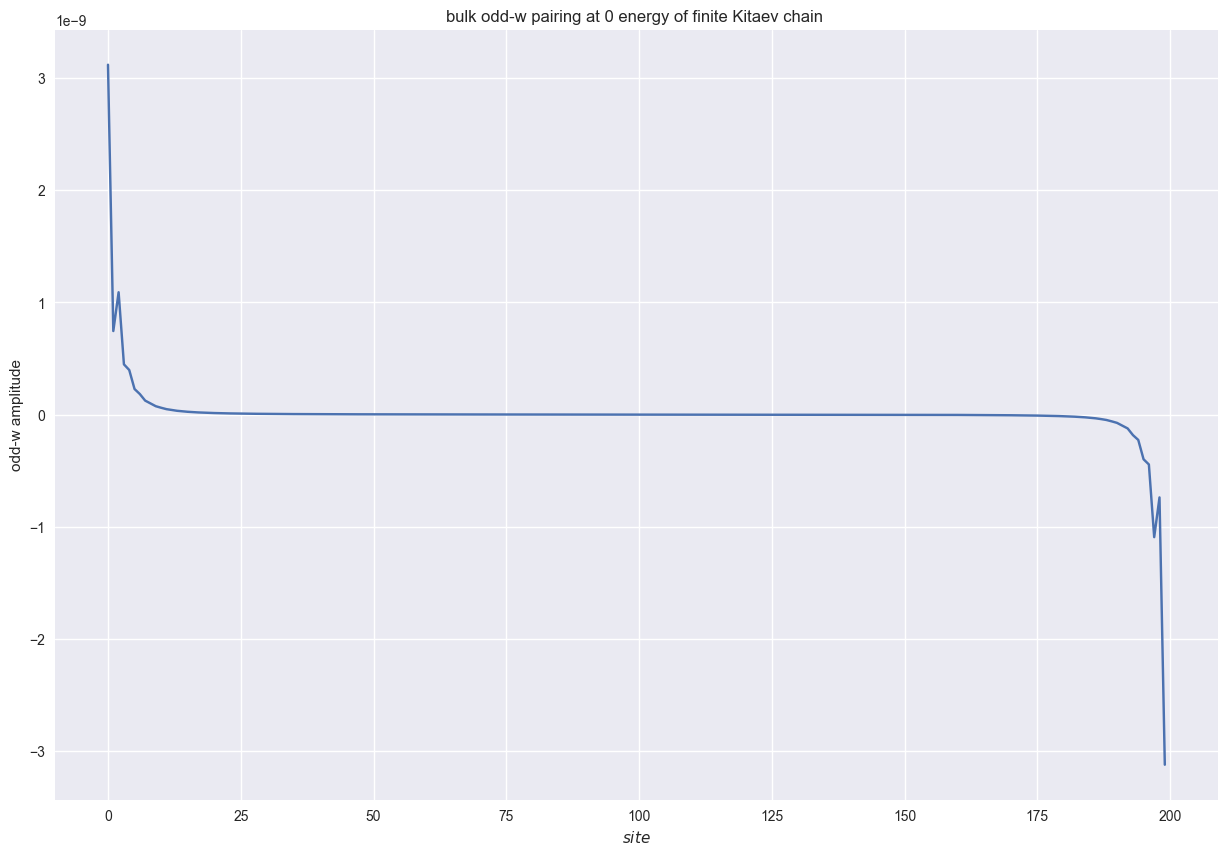

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


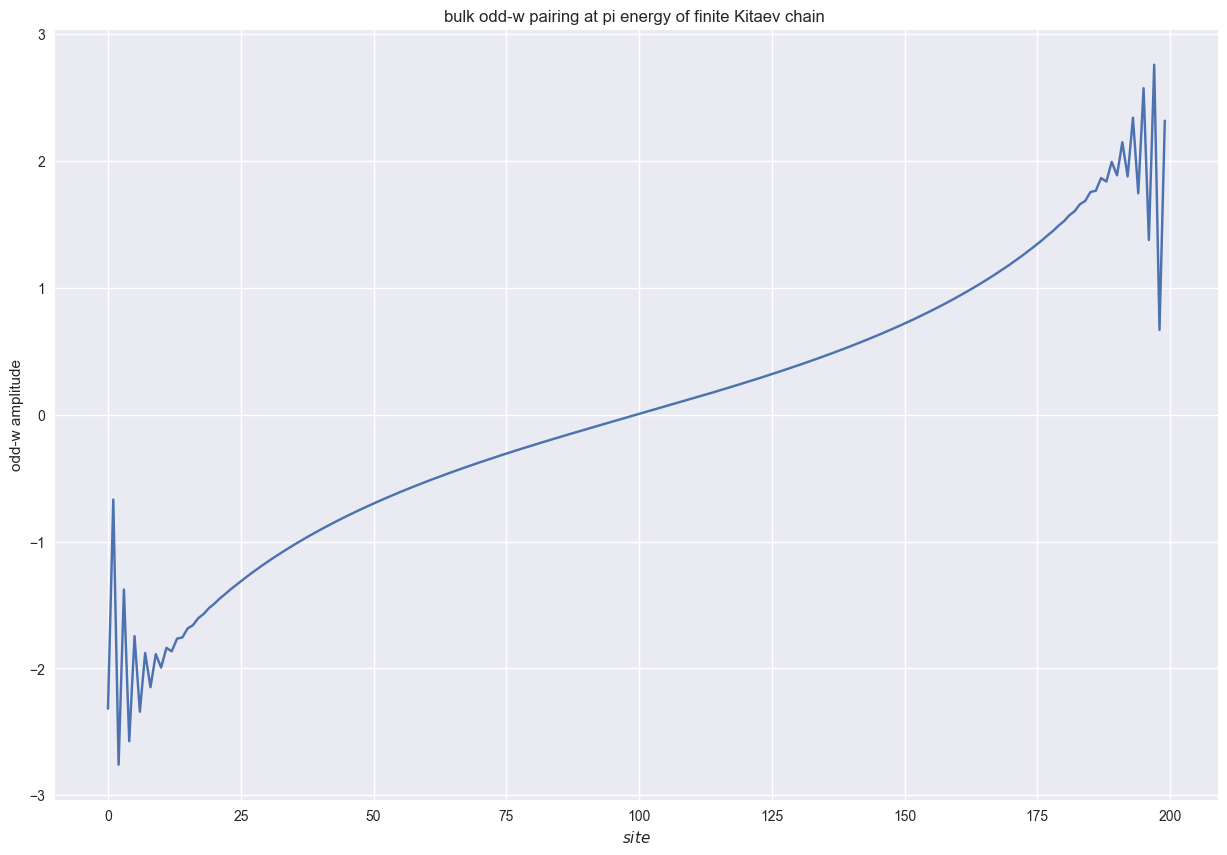

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


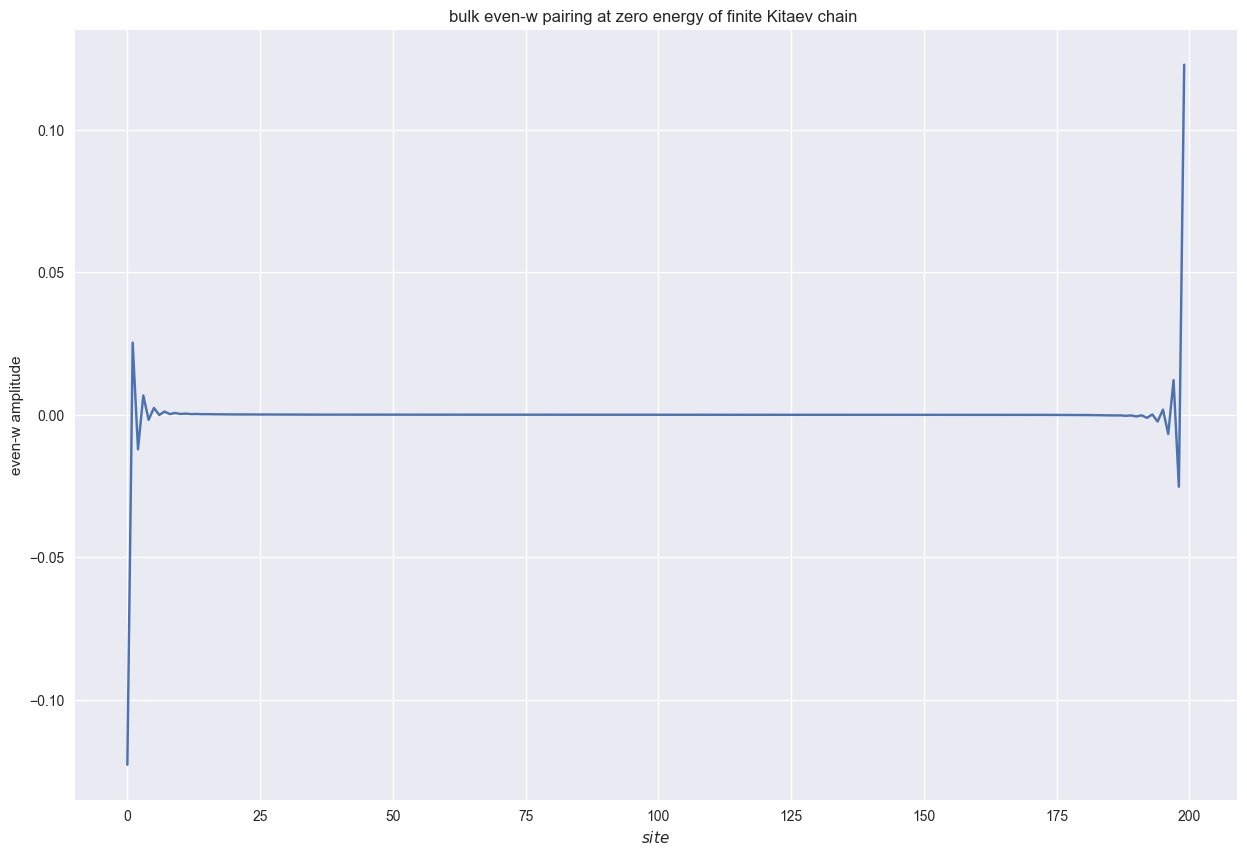

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


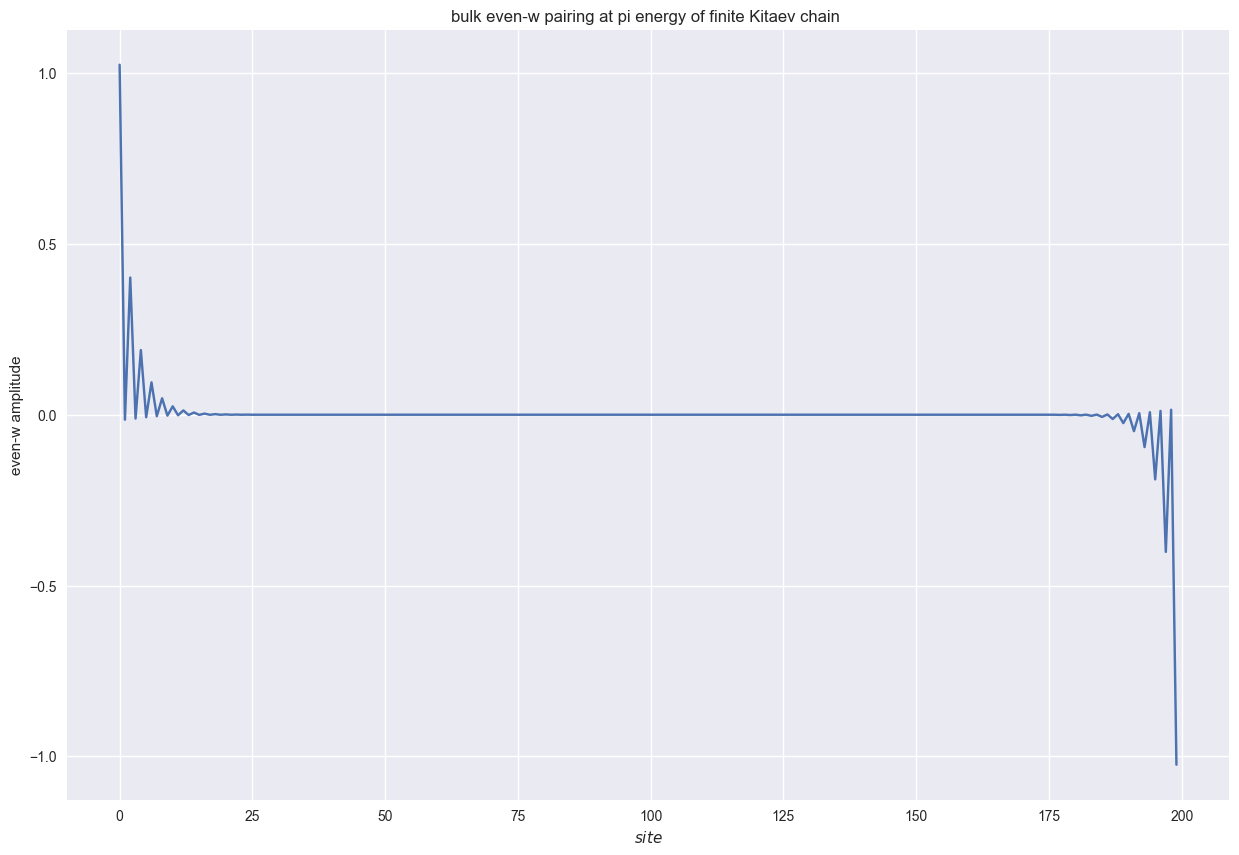

In [6]:
good_number = 20
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_odd_bulk[gg])
plt.ylabel('odd-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(range(N_global), f_0_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(range(N_global), f_pi_even_bulk[gg])
plt.ylabel('even-w amplitude')
plt.xlabel('$site$')
#plt.yscale('log')
plt.legend()
plt.show()

In [7]:

N_global = 100
d_global = 2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=0 * t), v=offsite(_delta=1 * t, _t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=1 * t), v=offsite(_delta=1 * t, _t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_k = np.arange(-3, 3, 0.01)
G_0_odd_bulk = []
G_0_even_bulk = []
G_pi_odd_bulk = []
G_pi_even_bulk = []

delta_amount =  0.00001
delta_positive_0 = (delta_amount * 1j) * np.eye(  d_global)
delta_negative_0 = (-delta_amount * 1j) * np.eye( d_global)
delta_positive_pi = (1 + delta_amount * 1j) * np.eye( d_global)
delta_negative_pi = (-1 - delta_amount * 1j) * np.eye( d_global)

for k in tqdm(var_k):
    h_f = floquet_hamiltonian([h_1.k_space_hamiltonian(k), h_2.k_space_hamiltonian(k)], T=0.5)
    G_0_pos = np.array(la.inv(delta_positive_0 - h_f))
    G_0_neg = np.array(la.inv(delta_negative_0 - h_f))

    G_0_odd_bulk.append((G_0_pos - G_0_neg) / 2)
    G_0_even_bulk.append((G_0_pos + G_0_neg) / 2)

    G_pi_pos = np.array(la.inv(delta_positive_pi - h_f))
    G_pi_neg = np.array(la.inv(delta_negative_pi - h_f))
    G_pi_odd_bulk.append((G_pi_pos - G_pi_neg) / 2)
    G_pi_even_bulk.append((G_pi_pos + G_pi_neg) / 2)
    pass


TypeError: onsite() got an unexpected keyword argument '_mu'

In [ ]:
f_0_odd_k = [(G_0_odd_bulk[i][0, 1].imag) for i in range(len(G_0_odd_bulk))]
f_0_even_k = [(G_0_even_bulk[i][0, 1].imag) for i in range(len(G_0_even_bulk))]
f_pi_odd_k = [(G_pi_odd_bulk[i][0, 1].imag) for i in range(len(G_pi_odd_bulk))]
f_pi_even_k = [(G_pi_even_bulk[i][0, 1].imag) for i in range(len(G_pi_even_bulk))]


good_number = 20
gg = good_number
plt.title("bulk odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_k, f_0_odd_k)
plt.ylabel('odd-w amplitude')
plt.xlabel('$momentum$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_k, f_pi_odd_k)
plt.ylabel('odd-w amplitude')
plt.xlabel('$momentum$')
#plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_k, f_0_even_k)
plt.ylabel('even-w amplitude')
plt.xlabel('$momentum$')
# plt.yscale('log')
plt.legend()
plt.show()

plt.title("bulk even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_k, f_pi_even_k)
plt.ylabel('even-w amplitude')
plt.xlabel('$momentum$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
N_global=2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=0 * t), v=offsite(_delta=1 * t, _t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=1 * t), v=offsite(_delta=1 * t, _t=t))
h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=0.5)

for n in range(N_global):
    print(np.isclose(h_f[d_global*n:(n+1)*d_global,d_global*n:(n+1)*d_global],h_f[d_global*(1+n):(n+2)*d_global,d_global*(n+1):(n+2)*d_global]))
    print("\n")

In [ ]:
print(h_f)